# Visualizations

Creating common figures is easy with `py-smps`. There are two primary out-of-the-box figures that can be made: the histogram (`smps.plots.histplot`) and the heatmap (`smps.plots.heatmap`), often referred to as a 'banana plot'.

All of the plotting functionality is made using `matplotlib`, so you can easily modify or extend them using common syntax and additional libraries such as `seaborn`.

## The Heatmap

The `heatmap` function makes it easy to visualize how the particle size distribution is changing over time, allowing you to observe growth/nucleation events, etc. To use the `heatmap` function, you must provide three arguments:

  * `X`: the time axis
  * `Y`: the bin midpoints
  * `Z`: the data you wish to plot, typically `dN/dlogDp`

  You may not agree with the default colormap choice (`viridis`), but you can easily change it as you see fit. However, you can't use `jet`!



In [1]:
import smps
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.set('notebook', style='ticks', font_scale=1.25, palette='colorblind')

warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the default smps visuals
smps.set()

We will use the same example dataset ("boston") that we've used throughout the rest of this tutorial.

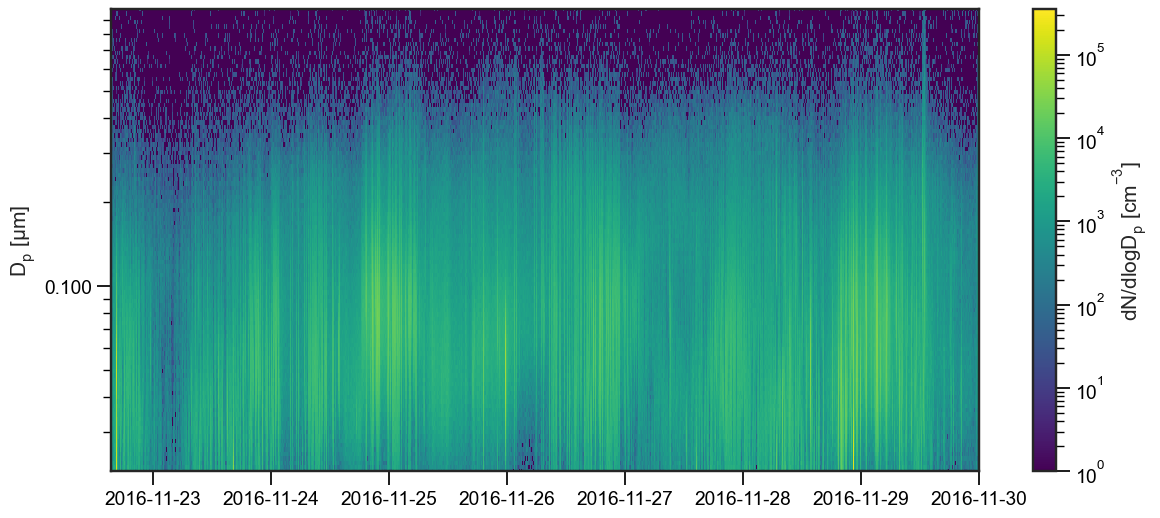

In [2]:
# Load the sample boston data
obj = smps.io.load_sample("boston")

X = obj.dndlogdp.index
Y = obj.midpoints
Z = obj.dndlogdp.T.values

# Plot the data
ax = smps.plots.heatmap(
    X, Y, Z,
    cmap='viridis',
    fig_kws=dict(figsize=(14, 6))
)

## The Particle Size Distribution (PSD)

To visualize the particle size distribution, use the `histplot` function. To plot the histogram, you must provide two pieces of information:

  * a histogram, provided as either an array or a dataframe (which will be averaged to an array)
  * the bins 

There are plenty of ways to customize these plots by providing the keyword arguments for the `matplotlib` bar chart using the kwarg `plot_kws` or the figure itself using the kwarg `fig_kws`. You can also plot onto an existing figure by providing the axis as an argument.

Here, we make a simple plot showing the same boston dataset:

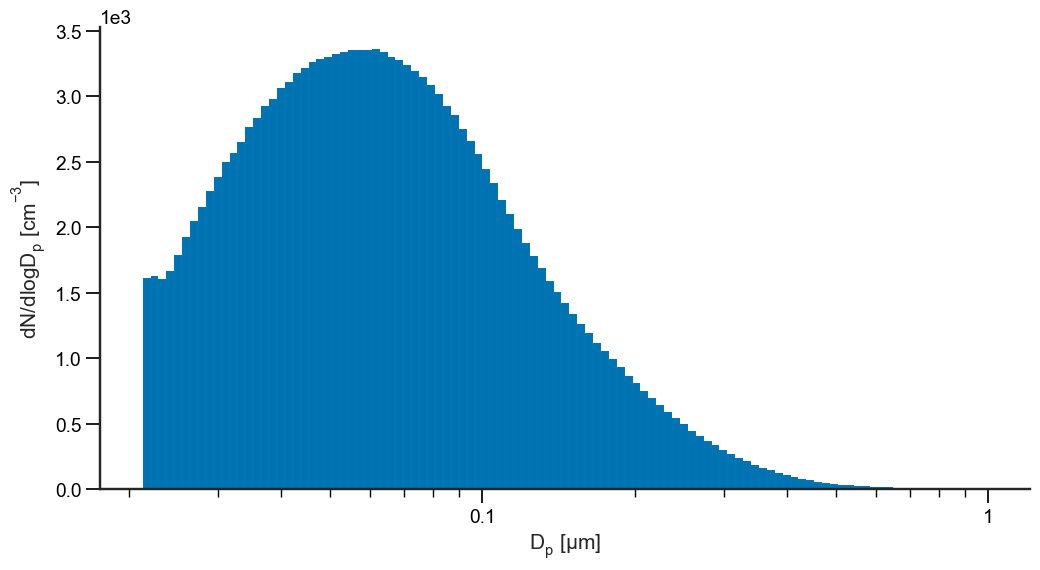

In [3]:
ax = smps.plots.histplot(
    obj.dndlogdp,
    obj.bins,
    plot_kws=dict(linewidth=0.01),
    fig_kws=dict(figsize=(12, 6))
)

# Fix the axis labels
ax.set_ylabel("$dN/dlogD_p \; [cm^{-3}]$")

sns.despine()

We can also plot in in volume-weighted space:

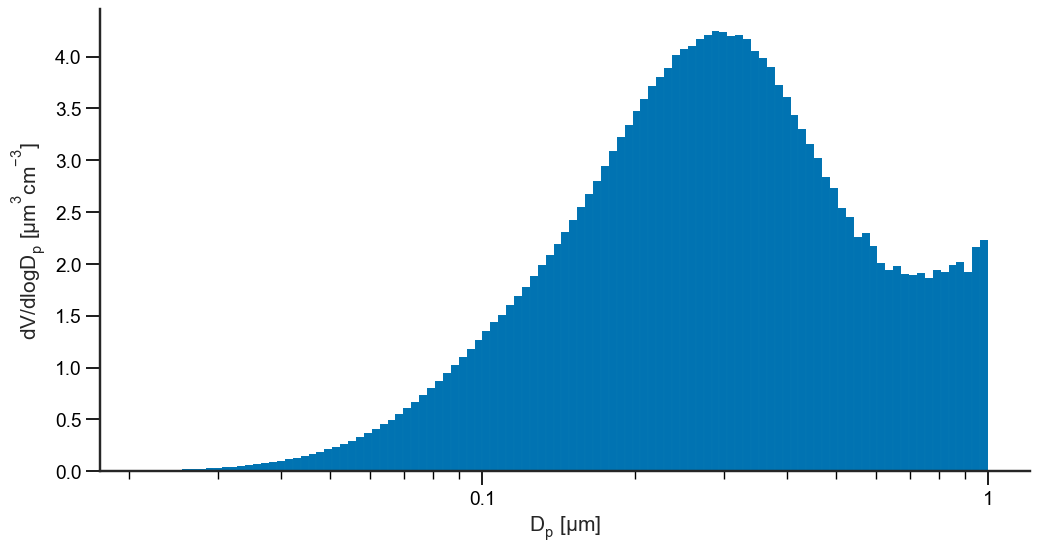

In [4]:
ax = smps.plots.histplot(
    obj.dvdlogdp,
    obj.bins,
    plot_kws=dict(linewidth=0.01),
    fig_kws=dict(figsize=(12, 6))
)

# Fix the axis labels
ax.set_ylabel("$dV/dlogD_p \; [µm^3cm^{-3}]$")

sns.despine()

Next, let's plot the same data, but plot the particle size distribution by day:

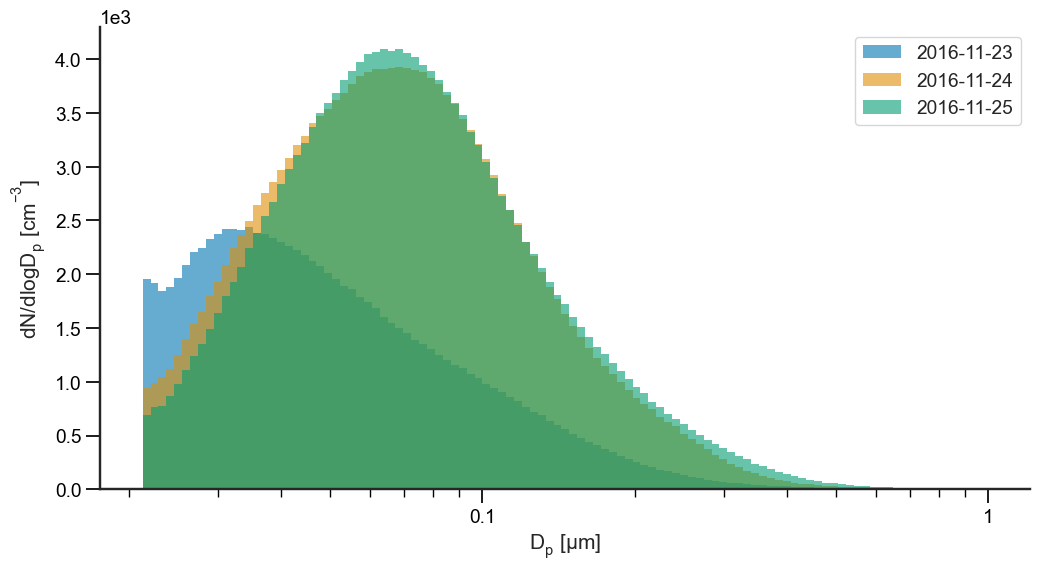

In [5]:
import itertools

# Create a list of dates to plot
dates = ["2016-11-23", "2016-11-24", "2016-11-25"]

ax = None
cp = itertools.cycle(sns.color_palette())

for date in dates:
    ax = smps.plots.histplot(
        obj.dndlogdp[date],
        obj.bins,
        ax=ax,
        plot_kws=dict(alpha=0.6, color=next(cp), linewidth=0.),
        fig_kws=dict(figsize=(12, 6))
    )

# Add a legend
ax.legend(dates, loc='best')

# Set the axis label
ax.set_ylabel("$dN/dlogD_p \; [cm^{-3}]$")

sns.despine()